For MTG MERSCOPE specimens: total counts (detected transcripts) vs Bulk RNASeq FPKM

Use blank total counts levels to indicate which genes should be checked more carefully 

Use blank counts/cell as background level and subtract before cell type mapping 

Plot blank counts/cell vs total gene counts cell and see if there is correlation 

In [ ]:
#relevant paths:
# H20.33.044, H19.33.004, H21.33.019, H21.33.015, H21.33.016, H21.33.006, H21.33.014, H21.33.022, H21.33.021, H21.33.012, H20.33.025, H21.33.008, H21.33.013

202204181242_H2133016Cx26MTG0200720103_VMSC02501


/home/imaging_mfish/anaconda3/envs/survey_nb/lib/python3.7/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


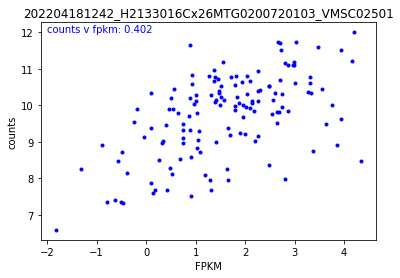

In [57]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json

figpath = Path('/home/imaging_mfish/projects/spatial-analysis-wg/code/merscope_processing/MERSCOPE_CORRS')
#find all paths that might be relevant here
root = Path('/home/imaging_mfish/MERSCOPENAS04_data/human/atlas/merfish_output/').glob('*') 
tracker = pd.read_excel('/home/imaging_mfish/projects/spatial-analysis-wg/code/merscope_processing/MERSCOPE Run tracker_211102.xlsx')
FPKM = pd.read_csv('/home/imaging_mfish/projects/survey_notebooks/notebooks/mtg_fpkm_human.csv', index_col=0)
# human gene subset
human_genes_linux_path = Path('/home/imaging_mfish/projects/survey_analysis/resources/human_genes.json')
with open(human_genes_linux_path, 'r') as hg:
    GENE_SUBSET = json.load(hg)
GENE_SUBSET = GENE_SUBSET['human_genes']
#look for files with MTG in the name, and if not then check tracker   

for subfolder in root:
    if 'MTG' in subfolder.stem:
        print(subfolder.stem)
        #get total counts per gene from detected transcripts file
        cpg = pd.read_csv(subfolder.joinpath('region_0/detected_transcripts.csv'), index_col=0).groupby('gene').count().reset_index()
        total_counts = cpg[['gene', 'barcode_id']].copy().rename(columns={'gene': 'gene_name', 'barcode_id': 'counts'})
        #correlate with bulkRNASeq FPKM, plot, save
        all_counts_df = pd.merge(FPKM[["gene_name","FPKM"]],total_counts[["gene_name" ,'counts']], on="gene_name")
        tot_corr = all_counts_df.corr()
        plt.plot(np.log(all_counts_df["FPKM"]),np.log(all_counts_df['counts']),'.b')
        plt.text(-2,12, "counts v fpkm corr: "+str(tot_corr.values[0,1])[:5], color = 'b', size = 10)
        plt.title(subfolder.stem)
        plt.xlabel('log FPKM')
        plt.ylabel('log counts')
        for ig,g in all_counts_df.iterrows():
            plt.text(np.log(g["FPKM"]), np.log(g["counts"]),g["gene_name"], color ='b', size =5)
        file = subfolder.stem+'_corr_cmap.png'
        plt.savefig(figpath.joinpath(file))
        #correlate blank counts/cell vs total gene counts/cell, plot, save
        
    break 